In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import randint
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [9]:
df = pd.read_csv("./us_accidents_road_data.csv", index_col=0)
df = df.sample(n = 400000)
df.head()


,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
739319,A-739320,2,False,False,False,False,False,False,False,False,False,False,False,False,False
442487,A-442488,2,False,False,False,False,False,False,False,False,False,False,False,False,False
1005434,A-1005435,2,False,False,False,False,False,False,False,False,False,False,False,False,False
541309,A-541310,2,False,False,False,False,False,False,False,False,False,False,False,False,False
1192138,A-1192139,2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
x = df.drop(['Severity', 'ID'], axis=1)
y = df["Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [11]:
# #****UNDER SAMPLING CODE SNIPPET
# # Summarize class distribution.
print("Before undersampling: ", Counter(y_train))
# #
undersample = RandomUnderSampler()
x_train, y_train = undersample.fit_resample(x_train, y_train)
#
# Summarize new class distribution.
print("After undersampling: ", Counter(y_train))

Before undersampling:  Counter({2: 66792, 3: 4040, 4: 3484, 1: 684})
After undersampling:  Counter({1: 684, 2: 684, 3: 684, 4: 684})


In [12]:
# Summarize class distribution.
# print("Before oversampling: ",Counter(y_train))
# #
# ros = RandomOverSampler()
# x_train, y_train = ros.fit_resample(x_train, y_train)
# #
# # Summarize new class distribution.
# print("After oversampling: ", Counter(y_train))


In [13]:
rfc = RandomForestClassifier(n_jobs=-1)

param_dist = {'n_estimators': randint(50, 10000), 'max_depth': randint(1, 20)}
rand_search = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter = 5, cv = 5, n_jobs=-1)

rand_search.fit(x_train, y_train)
y_pred = rand_search.predict(x_test)


Best hyperparameters: {'max_depth': 19, 'n_estimators': 4040}

Accuracy: 0.71968
Precision: [0.04272086 0.89970305 0.1103081  0.06074766]
Recall: [0.44978166 0.79261197 0.20465773 0.02197802]
f1 score: [0.0780303  0.84276911 0.14335146 0.03227809]


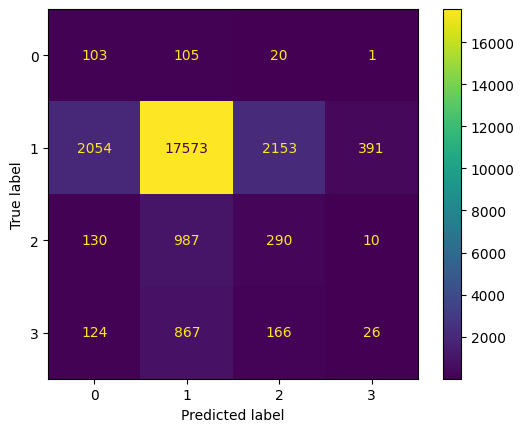

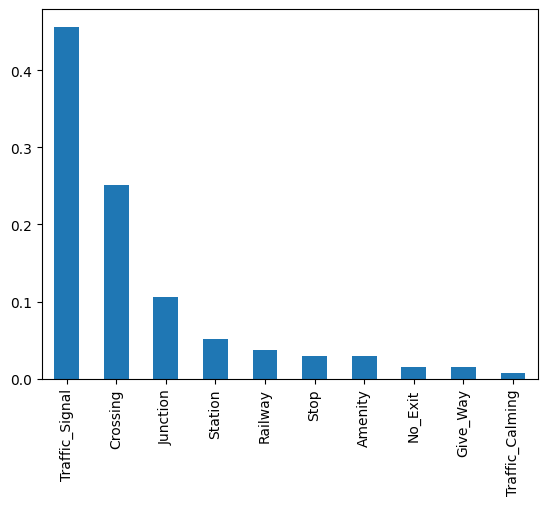


Top 10 important features:
 Traffic_Signal     0.456689
Crossing           0.250683
Junction           0.105524
Station            0.051043
Railway            0.037233
Stop               0.029752
Amenity            0.029089
No_Exit            0.014831
Give_Way           0.014699
Traffic_Calming    0.007498
dtype: float64


In [14]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)


# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Calculate model metrics.
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred, average = None)
model_recall = recall_score(y_test, y_pred, average = None)
model_f1 = f1_score(y_test, y_pred, average = None)

print("\nAccuracy:", model_accuracy)
print("Precision:", model_precision)
print("Recall:", model_recall)
print("f1 score:", model_f1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()


# Create a series containing feature importances from the model and feature names from the training data.
feature_importances = pd.Series(best_rf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
top_importances = feature_importances[:10]

# Plot a simple bar chart
top_importances.plot.bar()
plt.show()

print("\nTop 10 important features:\n", top_importances)